<a href="https://colab.research.google.com/github/Mike-AG2021/Analisis-Inteligente-de-Datos/blob/main/Pyhton/Doc/Clase/Caso_1_Regresi%C3%B3n_Lineal_Simple_Peso_EstaTura_datos_FIFA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Author: "Jesus Miguel Acosta Gurrola"

Date: "07-03-2022"

# Objetivo

Realizar predicciones de peso de jugadores de fútbol con los datos de FIFA de acuerdo a la variable estatura a partir de un modelo de regresión lineal simple.

# Descripción 
* Cargar librerías

* Cargar datos

* Seleccionar variables de estudio estatura y peso

* Crear datos de entrenamiento y datos de validación

* Construir el modelo de regresión lineal simple

* Evaluar el modelo

* Realizar predicciones con los datos validación

* Realizar predicciones con datos nuevos

* Interpretación del caso

# Desarrollo


# Cargar librerias

In [ ]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
#from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
#%matplotlib inline

## Cargar datos

Los datos se encuentran en la URL: https://raw.githubusercontent.com/rpizarrog/Analisis-Inteligente-de-datos/main/datos/datos.FIFA.limpios.csv



In [ ]:
datos = pd.read_csv("https://raw.githubusercontent.com/rpizarrog/Analisis-Inteligente-de-datos/main/datos/datos.limpios.csv", encoding='latin1')


## Explorar datos

Solo se describen las variables de interés Estatura y PesoKgs

In [ ]:
#datos.describe()
datos[['Estatura', 'PesoKgs']].describe()
# datos.head()



,Estatura,PesoKgs
count,17907.000000,17907.000000
mean,1.812325,75.279478
std,0.067671,7.077378
min,1.550000,49.900000
25%,1.750000,69.850000
50%,1.800000,74.840000
75%,1.850000,79.830000
max,2.060000,110.220000


Verificar si hay datos nulos ...

In [ ]:
print(datos['Estatura'].isnull().sum().sum())
print(datos['PesoKgs'].isnull().sum().sum())

0
0


Mostrando los nombres de columnas y si se quisiera se puediera cambiar nombre a las columna para mejor control

In [ ]:
# datos.columns
# datos = datos.rename(columns={'Unnamed: 0':'X'})
datos.columns

Index(['Unnamed: 0', 'X', 'Name', 'Age', 'Nationality', 'Overall', 'Potential',
       'Club', 'Preferred.Foot', 'International.Reputation', 'Weak.Foot',
       'Skill.Moves', 'Height', 'Weight', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'Valor', 'Estatura',
       'PesoKgs'],
      dtype='object')

### head()
Primeros 20 registros

In [ ]:
datos[['X', 'Name', 'Estatura', 'PesoKgs']].head(20)

,X,Name,Estatura,PesoKgs
0,1,L. Messi,1.70,72.12
1,2,Cristiano Ronaldo,1.88,83.01
2,3,Neymar Jr,1.75,68.04
3,4,De Gea,1.93,76.20
4,5,K. De Bruyne,1.80,69.85
5,6,E. Hazard,1.73,73.94
6,7,L. Modric,1.73,66.22
7,8,L. Suárez,1.83,86.18
8,9,Sergio Ramos,1.83,82.10
9,10,J. Oblak,1.88,87.09


## tail() 
Últimos 20 registros

In [ ]:
datos[['X', 'Name', 'Estatura', 'PesoKgs']].tail(20)

,X,Name,Estatura,PesoKgs
17887,17936,C. Ehlich,1.78,73.03
17888,17937,L. Collins,1.78,67.13
17889,17938,A. Kaltner,1.78,74.84
17890,17939,L. Watkins,1.75,79.83
17891,17940,J. Norville-Williams,1.80,76.20
17892,17941,S. Squire,1.85,74.84
17893,17942,N. Fuentes,1.73,66.22
17894,17943,J. Milli,1.91,84.82
17895,17944,S. Griffin,1.73,63.96
17896,17945,K. Fujikawa,1.70,66.22


## Partir datos en datos de entrenamiento y datos de validación

Las variables de interés serán Estaura y PesoKgs  de los datos de entrenamiento. 

De las dos variables de interés, Estatura y PesoKgs se determina que la variable predictora es Estatura y el PesoKgs es la variable de respuesta o también:

* Estatura es variable independiente y

* PesoKgs es variable dependiente

* Es decir, la variable PesoKgs depende de la Estatura
Con la función loc[:'atributo'] se eligen las variables de interés del conjunto de datos



In [ ]:

# estatura = datos.loc[:, 'Estatura'].values
# pesokgs = datos.loc[:, 'PesoKgs'].values


Preparando los datos con función array.reshape(-1, 1). -1, 1 significa que son todos los datos de un arreglo de una dimensión.

In [ ]:
# estatura = datos[['Estatura']].reshape(-1, 1)
# pesokgs = pesokgs.reshape(-1, 1)

estatura = datos[['Estatura']].to_numpy()
pesokgs = datos[['PesoKgs']].to_numpy()



### Datos de entrenamiento y datos de validación (test)

*   Elemento de la lista
*   Elemento de la lista



Ahora que se tiene la variable independiente estarur y la variable dependiente pesokgs, el siguiente paso es dividir estos datos en conjuntos de entrenamiento y prueba o validación.

Se utiiza el método *train_test_split()* que forma parte de la librería Scikit-Learn.

El argumento test_size establece el 30% para datos de validación por lo que el 70% pertenece a los datos de entrenamiento

In [ ]:
estatura_train, estatura_test, pesokgs_train, pesokgs_test = train_test_split(estatura, pesokgs, test_size=0.3, random_state=421)


## Creando el modelo

Se construirá el modelo usando *LinearRegression a partir* de la librería *sklearn.linear_model* con los datos de entrenamiento 

In [ ]:
estatura_train

array([[1.88],
       [1.78],
       [1.88],
       ...,
       [1.75],
       [1.88],
       [1.91]])

In [ ]:
modelo = LinearRegression()
modelo.fit(estatura_train, pesokgs_train)

LinearRegression()

### Dispersión de los datos
Dispersión de los datos de entrenamiento construeno la linea de tendencia y haciendo un diagrama de dispersión con las variables estatura y peso de los datos de entrenamiento.

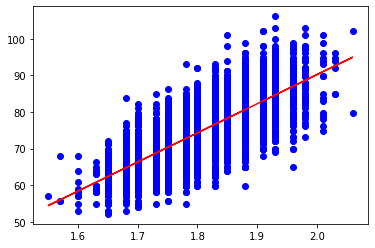

In [ ]:
linea_tendencia = modelo.predict(estatura_train)
plt.plot(estatura_train, pesokgs_train, 'o', color= 'blue')
plt.plot(estatura_train, linea_tendencia, color="red")


### Coeficientes

$$
Y = a + bx
$$

ó 

$$
Y = \beta_0 + \beta_1\cdot x
$$



In [ ]:
a = modelo.intercept_
b = modelo.coef_

print("Valor de a: ", a)
print("Valor de b; ", b)

Valor de a:  [-68.66661314]
Valor de b;  [[79.42857258]]


## Predicciones 

Las predicciones se hacen con el conjunto de datos de validación.

In [ ]:
predicciones = modelo.predict(estatura_test)
predicciones

array([[84.63053195],
       [76.68767469],
       [76.68767469],
       ...,
       [78.27624614],
       [78.27624614],
       [78.27624614]])

In [ ]:
pesokgs_test

array([[83.01],
       [78.93],
       [83.01],
       ...,
       [82.1 ],
       [87.09],
       [77.11]])

Crear un *data.frame* llamado *comparaciones* a partir de la creación de un diccionario con los valores reales del conjunto de entrenamiento y las predicciones calculadas. 

Con la función *flatten().tolist()* convierte el arreglo a una lista de una dimensión.


In [ ]:
diccionario = {'Estatura': estatura_test.flatten().tolist(),
                'Real' : pesokgs_test.flatten().tolist(), 
               'Predicho' : predicciones.flatten().tolist()}
diccionario

comparaciones = pd.DataFrame(diccionario)



In [ ]:
comparaciones.head(20)


,Estatura,Real,Predicho
0,1.93,83.01,84.630532
1,1.83,78.93,76.687675
2,1.83,83.01,76.687675
3,1.75,73.94,70.333389
4,1.73,73.03,68.744817
5,1.83,82.10,76.687675
6,1.88,73.94,80.659103
7,1.88,89.81,80.659103
8,1.88,84.82,80.659103
9,1.88,73.94,80.659103


In [ ]:
comparaciones.tail(20)

,Estatura,Real,Predicho
5353,1.70,69.85,66.361960
5354,1.83,72.12,76.687675
5355,1.88,83.91,80.659103
5356,1.83,91.17,76.687675
5357,1.83,74.84,76.687675
5358,1.83,77.11,76.687675
5359,1.68,73.03,64.773389
5360,1.98,88.00,88.601961
5361,1.65,64.86,62.390532
5362,1.70,59.87,66.361960


## Evaluando el modelo

Se evalúa el modelo de regresión lineal simple: 

$$
MAE = Pendiente ...
$$

$$
MSE = \frac{\sum(predicho_i - real_i)^{2}}{n}
$$

$$
RMSE = \sqrt{\frac{\sum(predicho_i - real_i)^{2}}{n}}
$$

$$
\text{Multipel R Squared } = R^2 = cor(x, y)^2 \text{; de Pearson}
$$



In [ ]:
print('Mean Absolute Error: MAE', metrics.mean_absolute_error(pesokgs_test, predicciones))
print('Mean Squared Error: MSE', metrics.mean_squared_error(pesokgs_test, predicciones))
print('Root Mean Squared Error RMSE:', np.sqrt(metrics.mean_squared_error(pesokgs_test, predicciones)))

r = np.corrcoef(estatura_train.flatten().tolist(), pesokgs_train.flatten().tolist())
r = r ** 2
r = r.reshape(-1,2)
r = r[0, 1]
print('Multiple R Square :', np.round(r, 4) )




Mean Absolute Error: MAE 3.630688528691699
Mean Squared Error: MSE 21.767950064390153
Root Mean Squared Error RMSE: 4.6656135785542885
Multiple R Square : 0.572


# Interpretación

El análisis de datos que hicimos fue con el conjunto de datos de FIFA. Los datos se encuentran en la dirección "https://raw.githubusercontent.com/rpizarrog/Analisis-Inteligente-de-datos/main/datos/datos.limpios.csv" y fue de los datos de fifa pero aun mas limpios. Nuestro propósito fue hacer una regresión lineal simple con estos datos. La variable independiente en este análisis es estatura de un jugador y la variable dependiente es PesoKgs que será Valor en formato numérico. Realizamos la correlación entre estaos 2 datos y nos dio el resultado en **"RMSE 4.6656135785542885"** en este caso realizando el analisis en python lo cual tambien nos indica que es una correlacion positiva considerable. El valor Multiple R-squared es 0.572. Podemos decir que para la correlacion de los valores, el Valor de **"a: -68.66661314"** y el
Valor de **"b; 79.42857258"**, para este caso significa que se hubiera establecido el modelo en el cual se acepta si hay un 70% o mas . El valor de la variable Estatura representa tan solo el **"57.2%"** del valor del PesoKgs. Entonces la variable predictiva Estatura si son altamente y estadísticamente significativas por debajo del 0.001 o con un nivel de confianza mayor al 99.9% El modelo predice positivamente considerable como se ve en la correlacion, hay probabilidad que otra variable tenga más relación con el Peso para tener un índice mayor de correlación. La diferencia es que hay mayor indice de correlacion.
Pero en este caso los datos cambiaron ya que modifique la semilla por mi numero de control, son los ultimos 4 digitos el cual fue "0421", en este caso el valor del 0, no lo reconoce, entonces solo se dejo como semilla "421", puede afectar un poco el analisis ya que solo son 3 digitos con los cuales se hizo la comparacion, podemos decir que si cambiaron notablemente los valores registrados sobre todo en **"Multiple R Square : 0.572"**

# Bibliografía

[https://pharos.sh/regresion-lineal-en-python-con-scikit-learn/](https://pharos.sh/regresion-lineal-en-python-con-scikit-learn/)